# Project 2: Customer Exit Prediction

# Introduction:

*   In this project, you will predict whether a customer will exit (CustomerExit) based on various service and demographic features.
*   You will conduct data exploration, preprocessing, and train machine learning models to predict customer exit.
*   Finally, you'll evaluate the models using classification metrics.

**Datasets Locations and Names:** Canvas -> Modules -> Week 10 -> Dataset -> "customer_exit.csv".

Please save your Google Colab project as FirstName_LastName_Project2.ipynb and submit (upload) your source code to Canvas.

# Dataset Description:

* **ServiceFee:** Monthly fee the customer pays.
* **SubscriptionType:** Type of contract (e.g., month-to-month, yearly).
* **MembershipDuration**: How many months the customer has been with the service.
* **CumulativeCharges:** Total amount billed to the customer.
* **Age:** Age of the customer.
* **Gender:** Gender of the customer.
* **CustomerExit:** The target variable, indicating whether the customer left (1 = exit, 0 = stays).

# Task 1: Exploratory Data Analysis (EDA)
* Visualize the distribution of the target variable (`CustomerExit`).
* Create scatter plots or histograms to explore relationships between features.
* Check for missing values.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('customer_exit.csv')

In [ ]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  505206 non-null  int64  
 1   gender               505206 non-null  object 
 2   membership_duration  505206 non-null  float64
 3   usage_frequency      505206 non-null  float64
 4   support_calls        505206 non-null  float64
 5   payment_delay        505206 non-null  float64
 6   subscription_type    505206 non-null  object 
 7   contract_length      505206 non-null  object 
 8   cumulative_charges   505206 non-null  float64
 9   last_interaction     505206 non-null  float64
 10  customer_exit        505206 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 42.4+ MB


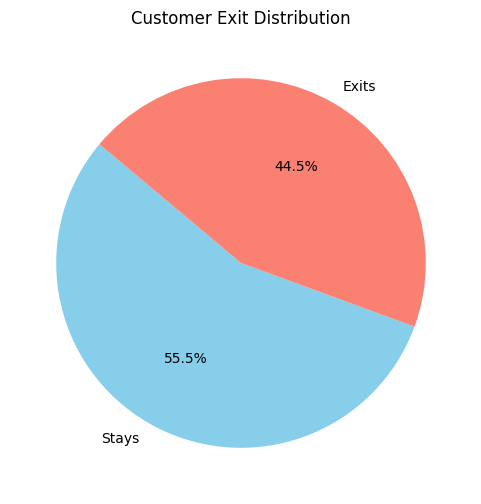

In [ ]:
# Calculate the proportion of each class
exit_counts = df['customer_exit'].value_counts()
exit_labels = ['Stays', 'Exits']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(exit_counts, labels=exit_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Customer Exit Distribution')
plt.show()


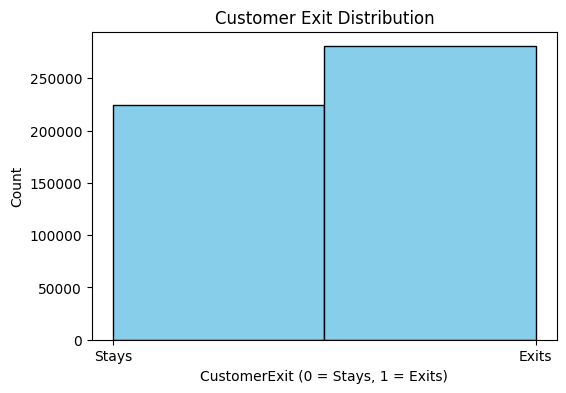

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['customer_exit'], bins=2, color='skyblue', edgecolor='black')
plt.title('Customer Exit Distribution')
plt.xlabel('CustomerExit (0 = Stays, 1 = Exits)')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Stays', 'Exits'])
plt.show()


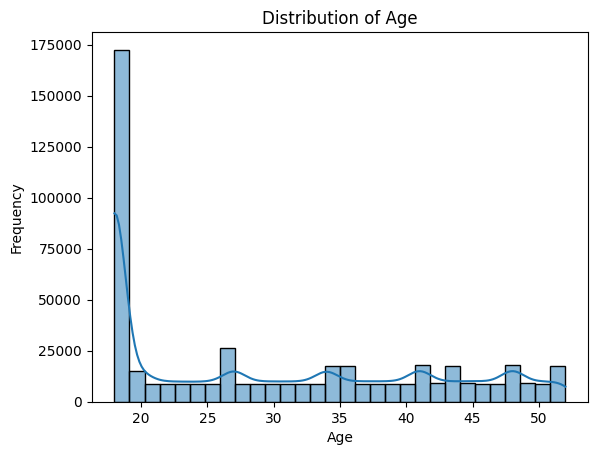

In [ ]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

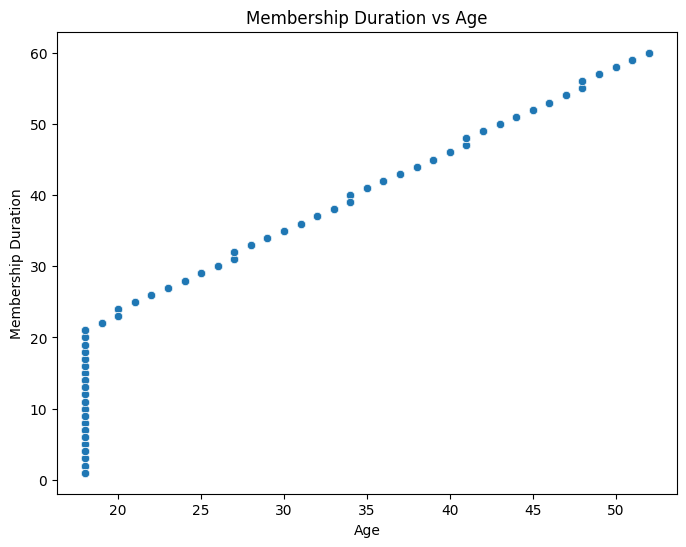

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='membership_duration', data=df)
plt.title('Membership Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Membership Duration')
plt.show()

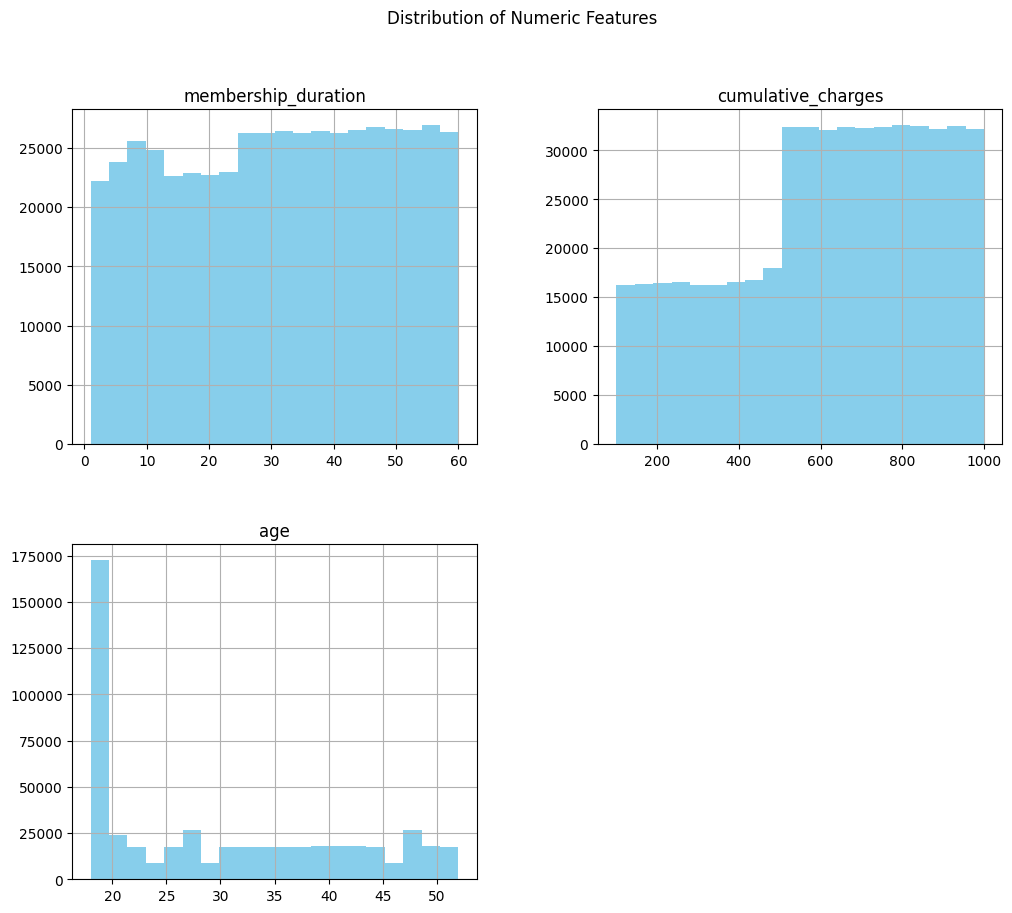

In [ ]:
numeric_features = ['membership_duration', 'cumulative_charges', 'age']
df[numeric_features].hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle('Distribution of Numeric Features')
plt.show()


#Check for Missing values

In [ ]:
print(df.isnull().sum())

age                    0
gender                 0
membership_duration    0
usage_frequency        0
support_calls          0
payment_delay          0
subscription_type      0
contract_length        0
cumulative_charges     0
last_interaction       0
customer_exit          0
dtype: int64


#HeatMap


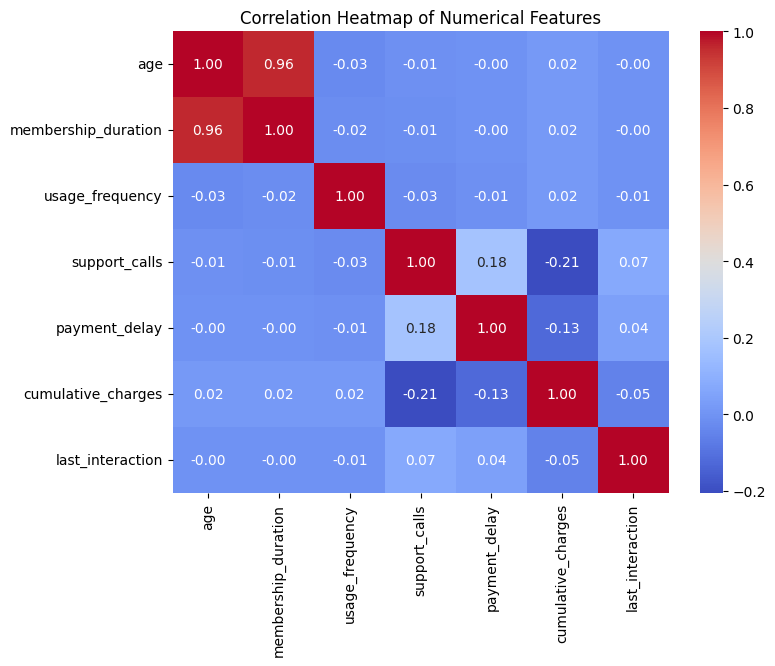

In [ ]:
numeric_features = ['age', 'membership_duration', 'usage_frequency',
                    'support_calls', 'payment_delay', 'cumulative_charges',
                    'last_interaction']

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Age and Membership Duration have a strong positve correlation.


# Task 2: Data Preprocessing with Pipelines and Feature Extraction
* Use Pipeline for handling missing values, scaling, and feature extraction.
* Use ColumnTransformer for applying different transformations to numeric and categorical features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Replace zero membership_duration values to avoid division by zero
df["membership_duration"] = df["membership_duration"].replace(0, np.nan)
df["service_fee"] = df["cumulative_charges"] / df["membership_duration"]

print(df.columns)

Index(['age', 'gender', 'membership_duration', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'cumulative_charges', 'last_interaction',
       'customer_exit', 'service_fee'],
      dtype='object')


In [ ]:
# Define numerical and categorical columns
numerical_cols = ["age", "membership_duration", "usage_frequency", "support_calls", "payment_delay", "cumulative_charges", "last_interaction", "service_fee"]
categorical_cols = ["gender", "subscription_type", "contract_length"]

In [ ]:
# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [ ]:
X = df.drop(columns='customer_exit',axis=1)  #Making the customer exit the feature
y = df['customer_exit']  # Target
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Your data preprocessing code here

# Task 3: Train Classification Models
Train at least 5 classification models within a pipeline:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Training Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": LinearSVC()
}

#Pipeline creation

In [ ]:
pipelines = {name: Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)]) for name, model in models.items()}

In [ ]:
# Your model training code here

# Task 4: Model Evaluation
* Evaluate your models using k-fold cross-validation (at least 5 folds) to assess how well the models generalize.
* Calculate and report the average accuracy, precision, recall, specificity, and F1-score from the cross-validation.
* Compare and discuss models based on their cross-validated performance.


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [ ]:
#Function for finding specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [ ]:
#Dictionary to hold each score type
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "specificity": make_scorer(specificity_score)
}

# Evaluate each model with 5-fold cross-validation
for name, pipeline in pipelines.items():
    scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring, error_score='raise')
    print(f"{name} Cross-Validation Results:")
    print(f"Accuracy: {np.mean(scores['test_accuracy']):.4f} ± {np.std(scores['test_accuracy']):.4f}")
    print(f"Precision: {np.mean(scores['test_precision']):.4f} ± {np.std(scores['test_precision']):.4f}")
    print(f"Recall: {np.mean(scores['test_recall']):.4f} ± {np.std(scores['test_recall']):.4f}")
    print(f"Specificity: {np.mean(scores['test_specificity']):.4f} ± {np.std(scores['test_specificity']):.4f}")
    print(f"F1 Score: {np.mean(scores['test_f1']):.4f} ± {np.std(scores['test_f1']):.4f}")
    print("\n")

Logistic Regression Cross-Validation Results:
Accuracy: 0.8451 ± 0.0008
Precision: 0.8752 ± 0.0012
Recall: 0.8409 ± 0.0005
Specificity: 0.8504 ± 0.0017
F1 Score: 0.8577 ± 0.0007


Random Forest Cross-Validation Results:
Accuracy: 0.9069 ± 0.0008
Precision: 0.8958 ± 0.0010
Recall: 0.9418 ± 0.0014
Specificity: 0.8633 ± 0.0015
F1 Score: 0.9182 ± 0.0007


Gradient Boosting Cross-Validation Results:
Accuracy: 0.9032 ± 0.0009
Precision: 0.8965 ± 0.0009
Recall: 0.9335 ± 0.0015
Specificity: 0.8655 ± 0.0013
F1 Score: 0.9146 ± 0.0008


K-Nearest Neighbors Cross-Validation Results:
Accuracy: 0.8743 ± 0.0012
Precision: 0.8894 ± 0.0009
Recall: 0.8834 ± 0.0021
Specificity: 0.8629 ± 0.0012
F1 Score: 0.8864 ± 0.0012


Support Vector Machine Cross-Validation Results:
Accuracy: 0.8429 ± 0.0009
Precision: 0.8803 ± 0.0012
Recall: 0.8298 ± 0.0008
Specificity: 0.8592 ± 0.0016
F1 Score: 0.8543 ± 0.0008




In [ ]:
# Your model evaluation code here

# Task 5: Hyperparameter Tuning with GridSearchCV
* Apply GridSearchCV to your best model for hyperparameter tuning.

#Grid Search on Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [5, 10]
}

# Set up GridSearchCV with the updated parameter grid
grid_search_rf = GridSearchCV(pipelines['Random Forest'], param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'membership_duration',
                                                                          'usage_frequency',
                                                                          'support_calls',
                                                                          'payment_delay',
                                                                          'cumulative_charges',
                                                                          'last_interaction',
                                                                          'service_fee']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'subscription_type',
                                                                          'contract_length'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 15],
                         'classifier__min_samples_split': [5, 10],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
# Your GridSearchCV code here

# Conclusion:
* Summarize your findings and explain any interesting insights from your analysis.

Found that RandomForest Classifier was the best parameter, but gradient boosting was very close second.

Linear SVC and Logistic regression were the worst which is interesting becasue logistic regression is binary classification.

I also noticed that this project took longer to run for the models than the last project. This may be due to this particular project being more complex than the last one.